### Доверительынй Интервал Для Доли
Работать мы будем с генеральной совокупностью, состоящей из бинарных событий

### Генерация Данных 

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

# Генерируем генеральную совокупность
binary_statistical_population = np.random.randint(2, size = 100000)

# Генерируем выборку 
random_sample = np.random.choice(binary_statistical_population, size = 1000)

print(f'Population Mean: {binary_statistical_population.mean()}') # среднее для доли (в нашем случае, например, клики по баннеру)
print(f'Sample Mean: {random_sample.mean()}')

Population Mean: 0.49771
Sample Mean: 0.502


Предположим, что мы работаем с некоторой рекламной сетью и у нас есть возможность откручивать баннер на нескольких рекламных площадках. В этом случае нам хочется измерять качество открутки наших баннеров и понимать — достаточно ли прекрасен каждый из тех баннеров, которые мы показываем, то есть, нравятся они пользователям или нет?

Для того чтобы это понять, мы можем померить, как часто пользователи кликают на эти баннеры, а как часто они их просто игнорируют. Такой показатель называется ```click through rate```, или «доля кликов по баннеру». В нашем случае это как раз и есть доля успехов в нашей генеральной совокупности. Чтобы оценить эту долю точно нам нужно дождаться конца открутки нашего баннера, далее, собрать все данные, данные с каждой из площадок, на которых мы его откручивали, и честно эту метрику посчитать.

В тех случаях, когда мы хотим знать, в каких диапазонах меняется настоящая доля, то есть какое минимальное и максимальное значение на нашу оценку среднего. Вот для того чтобы такую оценку получить, нужно построить **доверительный интервал на среднее.**

### Доверительный интервал для доли 
Чаще всего доверительные интервалы строятся на основе нормального распределения с использованием центральной предельной теоремы.

### Доверительный интервал на основе нормального распределения
$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [3]:
from statsmodels.stats.proportion import proportion_confint

normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')
print(f'Confidence Interval: [{round(normal_interval[0], 5)}, {round(normal_interval[1], 5)}] with width {round(normal_interval[1] - normal_interval[0], 5)}')

Confidence Interval: [0.47101, 0.53299] with width 0.06198


Следующий метод, который очень часто используют, это **доверительный интервал Уилсона.** Это некоторое улучшение предыдущего метода, которое позволяет получать качественные оценки в крайних случаях. То есть тогда, когда наша доля очень близка к 0 или очень близка к 1. Более того, этот интервал получается неплохим в случае, когда наша случайная **подвыборка довольно мала**, то есть включает в себя очень мало событий.

###  Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [4]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')
print(f'Confidence Interval: [{round(wilson_interval[0], 5)}, {round(wilson_interval[1], 5)}] with width {round(wilson_interval[1] - wilson_interval[0], 5)}')

Confidence Interval: [0.47106, 0.53292] with width 0.06186


В данном случае наш интервал имеет ширину 0.6. Часто мы с вами можем хотеть задать некоторое ограничение на ширину интервала. Например, мы хотим знать более точную оценку и получить интервал меньшей ширины. Таким образом, возникает вопрос: сколько же событий нам нужно знать для того, чтобы оценить долю с достаточной точностью?

Для того чтобы этот вопрос решить, существует очень удобный метод под названием ```sample size confint proportion.``` Он позволяет нам явно задать ограничение на ширину нашего интервала и получить количество событий, которое необходимо для того, чтобы получить оценку заданной ширины.

### Определение размера выборки для интервала заданной ширины

In [5]:
from statsmodels.stats.proportion import samplesize_confint_proportion

# Ограничиваем ширину интервала в 0.01
# Метод ниже вернет необходимый размер выборки, обеспечивающий заданную ширину
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01))) 
print(f'Observations Needed: {n_samples}')

Observations Needed: 9604


In [6]:
# Отберем необходимое число объектов 
random_sample = np.random.choice(binary_statistical_population, size = n_samples)

In [7]:
# Получаем интевал на долю для выбокри большего размера 
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')
print(f'Confidence Interval: [{round(normal_interval[0], 5)}, {round(normal_interval[1], 5)}] with width {round(normal_interval[1] - normal_interval[0], 5)}')

Confidence Interval: [0.48574, 0.50573] with width 0.01999


### Доверительный интервал для 2х долей

In [8]:
import pandas as pd
import scipy 
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

Допустим мы хотим поместить новый баннер на сайт. У нас есть 2 и мы не знаем какой больше понравится. Мы провели анкетирование, где попросили лайкнуть понравившейся баннер.

In [9]:
# Данные ислледования (0 - don't like, 1 - like)
data = pd.read_csv('banner_click_stat.txt', header = None, sep = '\t')
data.head()

,0,1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [10]:
# Создадим столбцы для DataFrame
data.columns = ['banner_a', 'banner_b']
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [11]:
# Статистика по кликам 
data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Давайте для начала интервально оценим баннеры. Мы видим, что доля кликов (или доля успехов) у нас относительно небольшая, поэтому для того, чтобы построить интервальную оценку доли, нам подойдет метод Уилсона который хорошо работает в случае крайних значений на вероятность.

In [12]:
# Строим доверительные интервалы для доли методом Уилсона
uilson_conf_interval_banner_a = proportion_confint(sum(data['banner_a']), data['banner_a'].shape[0], method = 'wilson')
uilson_conf_interval_banner_b = proportion_confint(sum(data['banner_b']), data['banner_b'].shape[0], method = 'wilson')

print(f'Confidence Interval For Banner A: {uilson_conf_interval_banner_a}')
print(f'Confidence Interval For Banner B: {uilson_conf_interval_banner_b}')

Confidence Interval For Banner A: (0.026961180875554734, 0.05058239748206931)
Confidence Interval For Banner B: (0.04074650524859452, 0.06867461683749176)


Интервалы достаточно узкие, но тем не менее **они пересекаются.** Это не очень удобно, потому что если бы один интервал лежал, например, полностью левее, чем другой, тогда нам было бы легко понять, что один баннер действительно лучше. А сейчас они пересекаются и не очень понятно, как их сравнить.

Для их сравнения необходимо построить доверительный интервал на разность двух долей

### Доверительный интервал для разности долей (для независимых выборок)
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$

$$p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [13]:
# Реализация формулы выше
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [14]:
print("Confidence Interval: [%f, %f]" % proportions_confint_diff_ind(data['banner_a'], data['banner_b']))

Confidence Interval: [-0.034157, 0.002157]


Мы видим, что относительно 0 наш интервал более сильно сдвинут влево, большая часть его лежит все-таки в отрицательной плоскости, но тем не менее 0 внутри и не очень понятно, действительно ли старый баннер хуже, чем новый. 

Предположим, что мы показывали баннер одним и тем же людям, то есть одни и те же люди оценивали как баннер A (старый баннер), так и баннер B. В этом случае мы с вами можем сказать, что речь идет уже о связанных выборках, они уже не являются независимыми. В этом случае мы можем использовать другую оценку разности долей.

### Доверительный интервал для разности долей (для зависимых выборок)

$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$

$$p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [15]:
# Реализация формулы выше
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [16]:
print("Confidence Interval: [%f, %f]" % proportions_confint_diff_rel(data['banner_a'], data['banner_b']))

Confidence Interval: [-0.026689, -0.005311]


Мы видим, что весь наш интервал лежит полностью левее нуля. Из этого можно сделать вывод, что действительно наш новый баннер лучше, чем старый, и выбрать нужно именно его

### Задания из теста 
**1)** Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [17]:
# Сгенерируем выборку, отражающую факт присутствия гена 13910T
sample = np.zeros(50)
sample[23] = 1
sample

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
# Строим ДИ 95% для доли на основе НР

normal_interval = proportion_confint(sum(sample), len(sample), method = 'normal')
print(f'Confidence Interval: [{round(normal_interval[0], 5)}, {round(normal_interval[1], 5)}] with width {round(normal_interval[1] - normal_interval[0], 5)}')

Confidence Interval: [0.0, 0.05881] with width 0.05881


**2)** В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [19]:
# Строим ДИ 95% для доли используя ДИ Уилсона
wilson_interval = proportion_confint(sum(sample), len(sample), method = 'wilson')
print(f'Confidence Interval: [{round(wilson_interval[0], 5)}, {round(wilson_interval[1], 5)}] with width {round(wilson_interval[1] - wilson_interval[0], 5)}')

Confidence Interval: [0.00354, 0.10495] with width 0.10142


**3)** Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%?

In [20]:
n_samples = int(np.ceil(samplesize_confint_proportion(sample.mean(), 0.01))) 
print(f'Observations Needed: {n_samples}')

Observations Needed: 753


**4)** Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ```±0.01``` на уровне доверия 95%, от неизвестного параметра ```p```. Посмотрите, при каком значении ```p``` нужно больше всего испытуемых. 

Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком ```p```, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ```±0.01``` на уровне доверия 95%?  

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Параметр p принимает значения от 0 до 1 (создадим всевозможные значения p c шагом 0.01)
values = np.linspace(0, 1, 101)
values

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [23]:
n_samples = np.empty(values.shape)
for i, p in enumerate(values):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))
n_samples

array([   0.,  381.,  753., 1118., 1476., 1825., 2167., 2501., 2828.,
       3147., 3458., 3761., 4057., 4345., 4626., 4898., 5163., 5421.,
       5670., 5913., 6147., 6373., 6592., 6804., 7007., 7203., 7391.,
       7572., 7745., 7910., 8068., 8217., 8360., 8494., 8621., 8740.,
       8851., 8955., 9051., 9139., 9220., 9293., 9358., 9416., 9466.,
       9508., 9543., 9570., 9589., 9600., 9604., 9600., 9589., 9570.,
       9543., 9508., 9466., 9416., 9358., 9293., 9220., 9139., 9051.,
       8955., 8851., 8740., 8621., 8494., 8360., 8217., 8068., 7910.,
       7745., 7572., 7391., 7203., 7007., 6804., 6592., 6373., 6147.,
       5913., 5670., 5421., 5163., 4898., 4626., 4345., 4057., 3761.,
       3458., 3147., 2828., 2501., 2167., 1825., 1476., 1118.,  753.,
        381.,    0.])

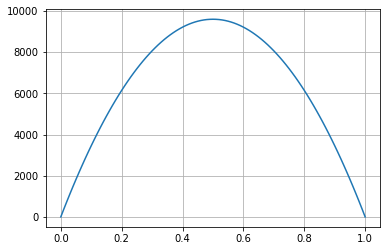

In [24]:
plt.plot(values, n_samples);
plt.grid(True)

In [25]:
# Получим индекс нужного нам элемента
n_samples[np.where(values == 0.5)]

array([9604.])